# <img src="./assets/course-icon.png" style="height:50px;display:inline"> Learning Methods of Deep Learning
---

create by Deepfinder



### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

1. 师徒相授：有监督学习（Supervised Learning）
2. 见微知著：无监督学习（Un-supervised Learning）
3. 无师自通：自监督学习（Self-supervised Learning）
4. 以点带面：半监督学习（Semi-supervised learning）
5. 明辨是非：对比学习（Contrastive Learning）
6. 举一反三：迁移学习（Transfer Learning）
7. 针锋相对：对抗学习（Adversarial Learning）
8. 众志成城：集成学习(Ensemble Learning) 
9. **殊途同归：联邦学习（Federated Learning）**
10. 百折不挠：强化学习（Reinforcement Learning）
11. 求知若渴：主动学习（Active Learning）
12. 万法归宗：元学习（Meta-Learning）

## Tutorial 09 - 殊途同归：联邦学习（Federated Learning）

在当今大数据时代，数据是驱动人工智能（AI）和机器学习（ML）发展的核心资源。然而，数据的分散性和隐私保护需求对传统的集中式机器学习方法提出了巨大挑战。集中式机器学习通常需要将所有数据上传到中央服务器进行训练，这不仅带来了数据隐私泄露的风险，还可能导致数据传输和存储的高成本。为了解决这些问题，**联邦学习(Federated Learning, FL)** 应运而生。

联邦学习是一种分布式机器学习框架，允许多个参与方（如移动设备、企业或机构）在不共享原始数据的情况下，协同训练一个全局模型。这种方法不仅保护了数据隐私，还充分利用了分散的计算资源。本文将介绍联邦学习的基本概念、技术优势，并通过一个基于MNIST数据集的联邦学习项目，展示其实际应用。

## <img src="https://img.icons8.com/dusk/64/000000/popular-topic.png" style="height:50px;display:inline">  联邦学习的基本概念
--- 

联邦学习的核心思想是**数据不动，模型动**。具体来说，联邦学习包括以下几个关键步骤：

1. 本地训练：

* 每个参与方（客户端）在本地使用自己的数据训练模型。

* 训练完成后，客户端将模型更新（如权重或梯度）发送给中央服务器。


2. 模型聚合：

* 中央服务器收集所有客户端的模型更新，并通过聚合算法（如联邦平均，FedAvg）生成一个全局模型。


3. 模型分发：

* 中央服务器将更新后的全局模型分发给所有客户端。

* 客户端使用新的全局模型继续本地训练。

通过多次迭代，全局模型逐渐收敛，最终达到与集中式训练相当的性能。

## <img src="https://img.icons8.com/cute-clipart/64/000000/task.png" style="height:50px;display:inline"> 联邦学习的技术优势
--- 

1. 隐私保护：

* 联邦学习不需要将原始数据上传到中央服务器，避免了数据泄露的风险。

* 通过差分隐私、同态加密等技术，可以进一步增强隐私保护。

2. 数据分布多样性：

* 联邦学习能够处理非独立同分布（Non-IID）数据，适应现实世界中数据的多样性。

3. 资源高效利用：

* 联邦学习充分利用了客户端的计算资源，减轻了中央服务器的负担。

4. 合规性：

* 联邦学习符合数据隐私保护法规（如GDPR），适用于医疗、金融等对数据隐私要求严格的领域。

## <img src="https://img.icons8.com/dusk/64/000000/lego-head.png" style="height:50px;display:inline"> 联邦学习的应用场景
---  

联邦学习在许多领域具有广泛的应用前景，包括但不限于：

* 医疗健康： 不同医院可以在不共享患者数据的情况下，协同训练疾病诊断模型。

* 金融风控： 银行和金融机构可以联合训练信用评分模型，同时保护客户隐私。

* 智能设备： 智能手机、智能家居设备可以在本地训练个性化模型，提升用户体验。

* 智慧城市： 城市中的传感器和设备可以协同训练交通流量预测、环境监测等模型。

## <img src="https://img.icons8.com/color/96/000000/tweezers.png" style="height:50px;display:inline"> 基于MNIST数据集的联邦学习项目
--- 

为了帮助读者更好地理解联邦学习的实现过程，我实现了一个基于MNIST数据集的联邦学习项目。MNIST是一个经典的手写数字识别数据集，包含60,000张训练图像和10,000张测试图像。在该项目中，我们模拟了多个客户端（如移动设备或机构）协同训练一个手写数字识别模型的过程。

**项目特点：**

* 数据分布： 将MNIST数据集划分为多个子集，每个子集分配给一个客户端，模拟现实中的数据分布。

* 本地训练： 每个客户端在本地使用自己的数据训练模型，并将模型更新发送给中央服务器。

* 模型聚合： 中央服务器使用联邦平均算法聚合客户端的模型更新，生成全局模型。

* 模型评估： 在每次联邦学习迭代后，评估全局模型在测试集上的性能。

**技术实现：**

* 使用PyTorch框架构建神经网络模型。

* 使用联邦平均算法实现模型聚合。

* 通过多次迭代，逐步提升全局模型的准确率。

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# 转换为 NumPy 数组
xTrain = train_dataset.data.numpy().reshape(-1, 784) / 255.0
yTrain = train_dataset.targets.numpy()  # 已经是类别索引
xTest = test_dataset.data.numpy().reshape(-1, 784) / 255.0
yTest = test_dataset.targets.numpy()    # 已经是类别索引

# 全局参数
batch_size = 64
epochs = 5

# 将数据转换为 PyTorch 张量
xTrain_tensor = torch.tensor(xTrain, dtype=torch.float32)
yTrain_tensor = torch.tensor(yTrain, dtype=torch.long)  # 使用 torch.long 表示类别索引
xTest_tensor = torch.tensor(xTest, dtype=torch.float32)
yTest_tensor = torch.tensor(yTest, dtype=torch.long)    # 使用 torch.long 表示类别索引

# 创建 DataLoader
train_dataset = TensorDataset(xTrain_tensor, yTrain_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(xTest_tensor, yTest_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 模型定义
class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练函数
def train(model, train_loader, criterion, optimizer, epochs):
    history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # labels 是类别索引
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)  # predicted 是类别索引
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # 直接比较类别索引
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        history['loss'].append(epoch_loss)
        history['accuracy'].append(epoch_accuracy)
        print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}')
    return history

# 初始化模型、损失函数和优化器
nonFmodel = DeepModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nonFmodel.parameters(), lr=0.0001)

# 训练模型
history = train(nonFmodel, train_loader, criterion, optimizer, epochs)

Epoch 1, Loss: 1.0643141178179905, Accuracy: 0.7744
Epoch 2, Loss: 0.4311890813238077, Accuracy: 0.8908833333333334
Epoch 3, Loss: 0.3416135678889909, Accuracy: 0.9067833333333334
Epoch 4, Loss: 0.3032634595532153, Accuracy: 0.9153333333333333
Epoch 5, Loss: 0.2790384936148424, Accuracy: 0.9215333333333333


In [2]:

numOfClients = 5  # 客户端数量
numOfIterations = 5  # 联邦学习迭代次数
clientDataInterval = len(xTrain) // numOfClients  # 每个客户端的数据量

In [3]:

xClientsList = []
yClientsList = []
for clientID in range(numOfClients):
    start = clientID * clientDataInterval
    end = start + clientDataInterval
    xClientsList.append(xTrain_tensor[start:end])
    yClientsList.append(yTrain_tensor[start:end])

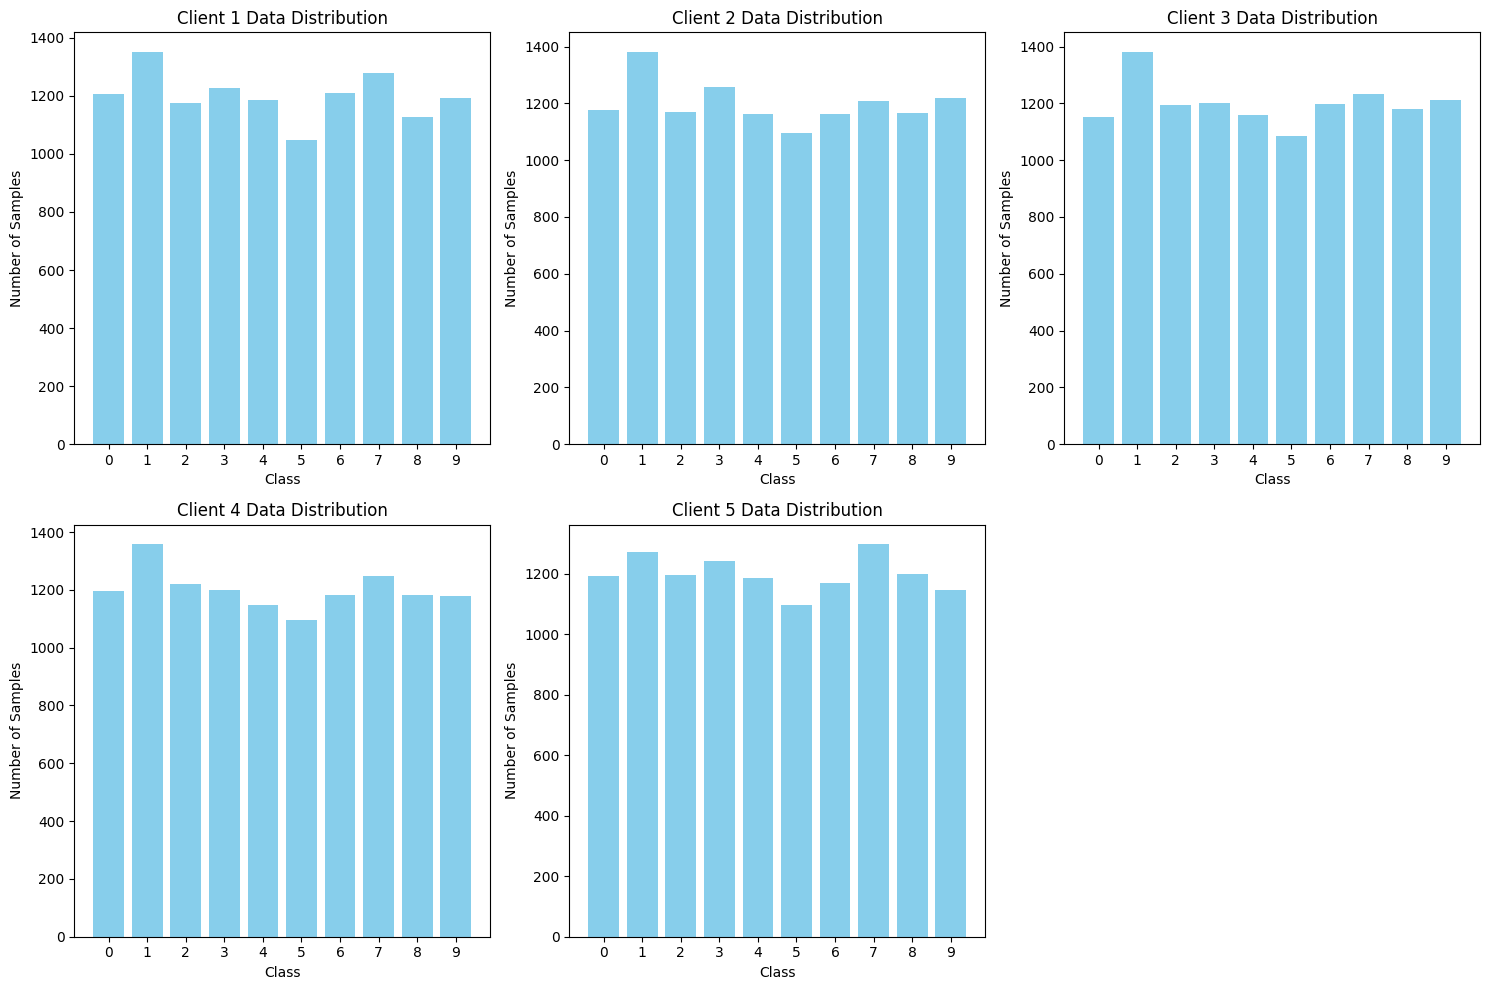

In [4]:
import matplotlib.pyplot as plt

def plot_client_data_distribution(yClientsList, numOfClients):
    plt.figure(figsize=(15, 10))
    for clientID in range(numOfClients):
        # 统计每个类别的样本数量
        class_counts = np.bincount(yClientsList[clientID].numpy(), minlength=10)
        
        # 绘制柱状图
        plt.subplot(2, 3, clientID + 1)  # 2 行 3 列的子图布局
        plt.bar(range(10), class_counts, color='skyblue')
        plt.title(f'Client {clientID + 1} Data Distribution')
        plt.xlabel('Class')
        plt.ylabel('Number of Samples')
        plt.xticks(range(10))  # 设置 x 轴刻度为 0-9
    plt.tight_layout()
    plt.show()

# 划分客户端数据
xClientsList = []
yClientsList = []
for clientID in range(numOfClients):
    start = clientID * clientDataInterval
    end = start + clientDataInterval
    xClientsList.append(xTrain_tensor[start:end])
    yClientsList.append(yTrain_tensor[start:end])

# 可视化客户端数据分布
plot_client_data_distribution(yClientsList, numOfClients)

In [5]:

clientsModelList = []
for clientID in range(numOfClients):
    model = DeepModel()
    model.load_state_dict(nonFmodel.state_dict())  # 加载服务器的初始权重
    clientsModelList.append(model)

In [ ]:

def federated_learning(server_model, clientsModelList, xClientsList, yClientsList, numOfIterations, batch_size, criterion):
    for iteration in range(numOfIterations):
        print(f"Iteration {iteration + 1}/{numOfIterations}")
        
        # 客户端本地训练
        client_weights = []
        for clientID in range(numOfClients):
            print(f"Training client {clientID + 1}/{numOfClients}")
            client_model = clientsModelList[clientID]
            client_model.train()  # 设置模型为训练模式
            
            # 为每个客户端创建独立的优化器
            client_optimizer = optim.Adam(client_model.parameters(), lr=0.0001)
            
            # 创建客户端的数据加载器
            client_dataset = TensorDataset(xClientsList[clientID], yClientsList[clientID])
            client_loader = DataLoader(client_dataset, batch_size=batch_size, shuffle=True)
            
            # 客户端本地训练
            for epoch in range(10):  # 每个客户端训练 10 个 epoch
                running_loss = 0.0
                correct = 0
                total = 0
                for inputs, labels in client_loader:
                    client_optimizer.zero_grad()
                    outputs = client_model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    client_optimizer.step()
                    
                    # 计算训练指标
                    running_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                
                # 打印客户端训练结果
                epoch_loss = running_loss / len(client_loader)
                epoch_accuracy = correct / total
                print(f"Client {clientID + 1}, Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")
            
            # 保存客户端的权重
            client_weights.append(client_model.state_dict())
        
        # 服务器聚合权重（FedAvg）
        print("Aggregating client weights...")
        avg_weights = {}
        for key in client_weights[0].keys():
            avg_weights[key] = torch.stack([client_weights[i][key] for i in range(numOfClients)]).mean(0)
        
        # 更新服务器模型
        server_model.load_state_dict(avg_weights)
        
        # 更新客户端模型
        for clientID in range(numOfClients):
            clientsModelList[clientID].load_state_dict(server_model.state_dict())
        
        # 在测试集上评估服务器模型
        server_model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = server_model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total
        print(f"Server model accuracy after iteration {iteration + 1}: {accuracy:.4f}")

# 初始化服务器模型
server_model = DeepModel()
server_model.load_state_dict(nonFmodel.state_dict())

# 运行联邦学习
federated_learning(server_model, clientsModelList, xClientsList, yClientsList, numOfIterations, batch_size, criterion, optimizer)

Iteration 1/5
Training client 1/5
Client 1, Epoch 1, Loss: 0.25442665502270484, Accuracy: 0.9296666666666666
Client 1, Epoch 2, Loss: 0.24710868604164174, Accuracy: 0.9306666666666666
Client 1, Epoch 3, Loss: 0.2416693331237803, Accuracy: 0.93275
Client 1, Epoch 4, Loss: 0.23599671370330008, Accuracy: 0.9344166666666667
Client 1, Epoch 5, Loss: 0.23226321789812535, Accuracy: 0.9355833333333333
Client 1, Epoch 6, Loss: 0.22663887760582122, Accuracy: 0.9370833333333334
Client 1, Epoch 7, Loss: 0.22229622411442565, Accuracy: 0.9388333333333333
Client 1, Epoch 8, Loss: 0.21833917011130363, Accuracy: 0.9390833333333334
Client 1, Epoch 9, Loss: 0.21452935036034027, Accuracy: 0.9404166666666667
Client 1, Epoch 10, Loss: 0.21081844095061433, Accuracy: 0.9420833333333334
Training client 2/5
Client 2, Epoch 1, Loss: 0.2733165322545361, Accuracy: 0.92425
Client 2, Epoch 2, Loss: 0.2656372262838673, Accuracy: 0.9265
Client 2, Epoch 3, Loss: 0.2590672530709429, Accuracy: 0.9293333333333333
Client 2